# Spatial Dataset

In [1]:
import json
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colrs

from shapely.geometry import shape as Shape
import numpy as np

from descartes.patch import PolygonPatch

plt.rcParams['font.size'] = 18

## Constants

In [2]:
city_dims = {
    'Bordeaux': (334, 342),
    'Clermont-Ferrand': (208, 268),
    'Dijon': (195, 234),
    'Grenoble': (409, 251),
    'Lille': (330, 342),
    'Lyon': (426, 287),
    'Mans': (228, 246),
    'Marseille': (211, 210),
    'Metz': (226, 269),
    'Montpellier': (334, 327),
    'Nancy': (151, 165),
    'Nantes': (277, 425),
    'Nice': (150, 214),
    'Orleans': (282, 256),
    'Paris': (409, 346),
    'Rennes': (423, 370),
    'Saint-Etienne': (305, 501),
    'Strasbourg': (296, 258),
    'Toulouse': (280, 347),
    'Tours': (251, 270)
    }

## Load Data

### Grid layer

In [3]:
city_str = 'Lyon'

n_rows, n_cols = city_dims[city_str]

city_geojson_file = f'./data/{city_str}.geojson'
fd = open(city_geojson_file)
city_geojson = json.load(fd)
fd.close()

In [4]:
# showing one of the features
city_geojson['features'][0]

{'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[4.7662070878542515, 45.55631465259445],
    [4.766246657177647, 45.55721386239888],
    [4.767526651889026, 45.5571860567685],
    [4.767487061740877, 45.55628684742171],
    [4.7662070878542515, 45.55631465259445]]]},
 'properties': {'tile_id': 66}}

In [5]:
tile_id = city_geojson['features'][0]['properties']['tile_id']

row_index = int(tile_id // n_cols)
col_index = int(tile_id % n_cols)
print(f'row_index: {row_index}, col_index: {col_index}')

row_index: 0, col_index: 66


### Matrix representation

In [6]:
# let's create a mask of the city, where the value 1 indicates a valid tile and 0 an invalid tile
city_mask = np.zeros((n_rows, n_cols))

for feature in city_geojson['features']:
    tile_id = feature['properties']['tile_id']
    row_index = int(tile_id // n_cols)
    col_index = int(tile_id % n_cols)
    city_mask[row_index, col_index] = 1

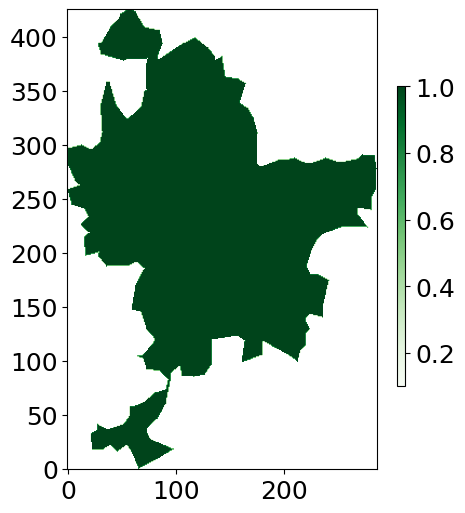

In [7]:
cmap_region = cm.get_cmap('Greens').copy()
cmap_region.set_under('w', 0)
norm_region = colrs.Normalize(vmin=0.1, vmax=1)

fig = plt.figure(figsize=(4, 6))
plt.imshow(city_mask, origin='lower', cmap=cmap_region, norm=norm_region)

cax = fig.add_axes([0.95, 0.25, 0.02, .5])
plt.colorbar(cax=cax)

plt.show()

### Communes layers

In [9]:
city_str = 'Lyon'

city_geojson_file = f'./data/cities_communes/{city_str}.geojson'
fd = open(city_geojson_file)
city_geojson = json.load(fd)
fd.close()

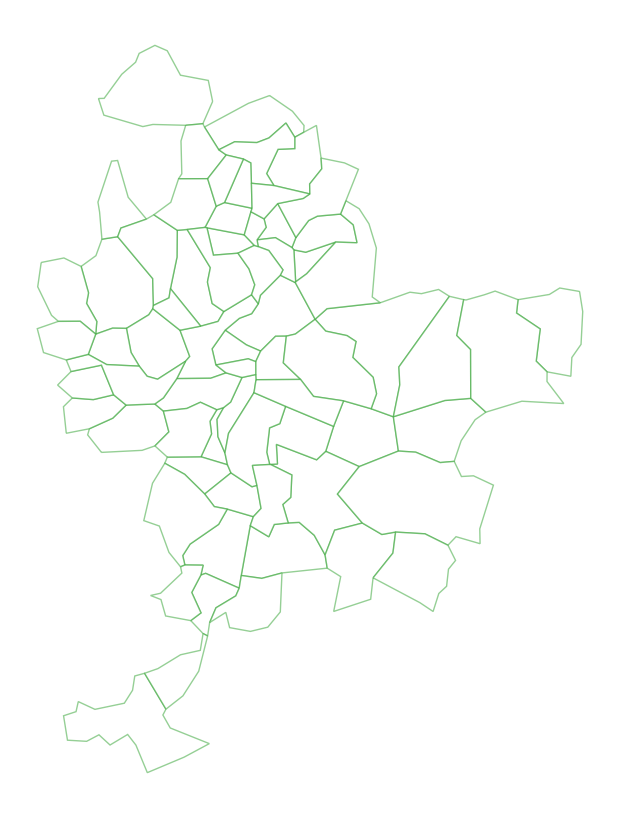

In [12]:
fig = plt.figure(figsize=(6, 8))
ax = fig.add_axes([0, 0, 1, 1])

for feature in city_geojson['features']:
    commune_shape = Shape(feature['geometry'])
    patch = PolygonPatch(commune_shape, fc='white', ec='tab:green', alpha=.5, lw=1)

    ax.add_patch(patch)

plt.autoscale(True)
plt.axis('off')


plt.show()

### IRIS layers

In [13]:
city_str = 'Lyon'

city_geojson_file = f'./data/cities_iris/{city_str}.geojson'
fd = open(city_geojson_file)
city_geojson = json.load(fd)
fd.close()

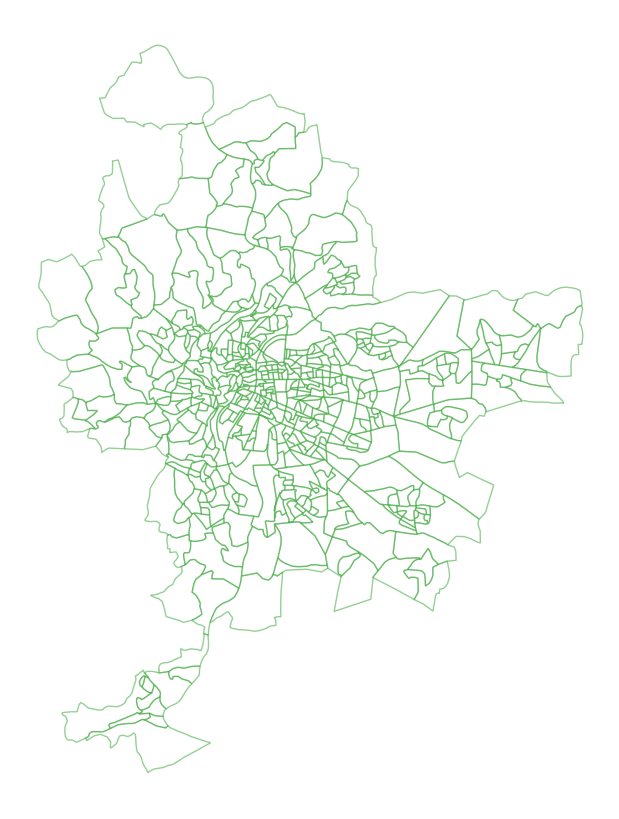

In [14]:
fig = plt.figure(figsize=(6, 8))
ax = fig.add_axes([0, 0, 1, 1])

for feature in city_geojson['features']:
    iris_shape = Shape(feature['geometry'])
    patch = PolygonPatch(iris_shape, fc='white', ec='tab:green', alpha=.5, lw=1)

    ax.add_patch(patch)

plt.autoscale(True)
plt.axis('off')


plt.show()